In [1]:
from skimage.measure import compare_ssim
import argparse
import cv2
import numpy as np
import scipy

In [2]:
def stretch_contrast(img):
# img = cv2.imread("zelda3_bm20_cm20.jpg", cv2.IMREAD_COLOR)

# normalize float versions
    norm_img1 = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    norm_img2 = cv2.normalize(img, None, alpha=0, beta=1.2, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

    # scale to uint8
    norm_img1 = (255*norm_img1).astype(np.uint8)
    norm_img2 = np.clip(norm_img2, 0, 1)
    norm_img2 = (255*norm_img2).astype(np.uint8)

    return norm_img2


In [3]:
import glob

source_path = "C:\\Users\\Mukesh_2\\Downloads\\Clipped_NDVI"

image_files = [source_path + '/' + f for f in glob.glob('*.tif')]
file_names=[f for f in glob.glob('*.tif')]

ssim_array=[]

common_image="awifs_ndvi_201801_15_2_clipped.tif"
file_names.remove(common_image)
imageA = cv2.imread("awifs_ndvi_201801_15_2_clipped.tif")
imageA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
imageA = stretch_contrast(imageA)

In [4]:
for image in image_files:
    print(image)
    image_name=image.split('/')[-1]
    
    if(common_image==image_name):
        continue
    
    imageB = cv2.imread(image)
    #imageB=imageB.reshape((imageB.shape[1],imageB.shape[0],imageB.shape[2]))
    imageB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
    # clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    imageB = stretch_contrast(imageB)
    # convert the images to grayscale
    # grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    # grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

    (score, diff) = compare_ssim(imageA, imageB, full=True)
    ssim_array.append(1-score)

C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201701_15_1_clipped.tif
C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201701_15_2_clipped.tif
C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201702_15_1_clipped.tif
C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201702_15_2_clipped.tif
C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201703_15_1_clipped.tif
C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201703_15_2_clipped.tif
C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201704_15_1_clipped.tif
C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201704_15_2_clipped.tif
C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201705_15_1_clipped.tif
C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201705_15_2_clipped.tif
C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201706_15_1_clipped.tif
C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201706_15_2_clipped.tif
C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201707_15_1_clipped.tif
C:\Users\Muk

In [5]:
for i in range(len(image_files)-1):
        print(ssim_array[i],image_files[i])

0.4899218548104832 C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201701_15_1_clipped.tif
0.42353297697067616 C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201701_15_2_clipped.tif
0.48167934208705865 C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201702_15_1_clipped.tif
0.5363789338848113 C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201702_15_2_clipped.tif
0.6068213683872434 C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201703_15_1_clipped.tif
0.6890803112617432 C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201703_15_2_clipped.tif
0.696023028110345 C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201704_15_1_clipped.tif
0.6653192186172195 C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201704_15_2_clipped.tif
0.6486582860279992 C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201705_15_1_clipped.tif
0.6956527724857369 C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201705_15_2_clipped.tif
0.7701390363320618 C:\Users\Mukesh_2\Downloads\Cl

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# x = np.arange(0, 5, 0.1)
# y = np.sin(x)
plt.plot(file_names,ssim_array)
plt.show()

<Figure size 640x480 with 1 Axes>

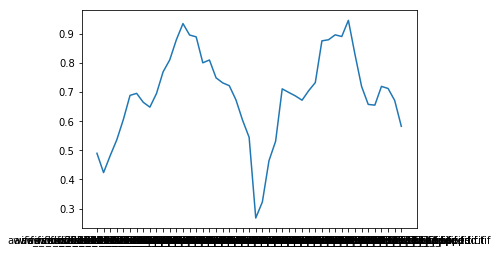

In [7]:
plt.plot(file_names,ssim_array)

In [17]:
peaks=scipy.signal.find_peaks(ssim_array)
print(peaks)

(array([ 6, 13, 17, 28, 36, 38, 43], dtype=int64), {})


In [19]:
prominance,left_bases,right_bases=scipy.signal.peak_prominences(ssim_array, peaks[0].tolist())

In [20]:
print(prominance)

[0.04736474 0.51258006 0.00967324 0.03903536 0.00565479 0.36452645
 0.06445333]


In [25]:
new_peaks=[]
for i in range(len(peaks[0])):
    if(prominance[i]>0.1):
        new_peaks.append(peaks[0][i])

In [26]:
print(new_peaks)

[13, 38]


In [30]:
for i in range(len(new_peaks)):
    print(image_files[new_peaks[i]])

C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201707_15_2_clipped.tif
C:\Users\Mukesh_2\Downloads\Clipped_NDVI/awifs_ndvi_201808_15_1_clipped.tif
